# Invistigation of the Google dataset.

The aim of this prototype to take a prophylactic approach and improve the revenue of undervalued Google's apps to motivate the developers to keep working on them.

Since her department's budget for marketing won't allow her to invest on ads (which would boost the number of sales), the only way to improve the revenue is by tweaking the price. She requests that you determine which paid apps are undervalued (undervalued here means that their price could be increased without lowering demand).
The prototype conducted in order to achieve:

1.Having a prototype makes it much easier to estimate the cost of a fully fleshed-out project, be it human, technological, or financial resources.

2.Having a more accurate estimate of the cost allows decision-makers to not go through with the project if it doesn't seem profitable enough, or not the best allocation of resources at that point in time.

3.It allows grunt workers (like ourselves) to change and add missing requirements to complete the project. Oftentimes these are overlooked and only spotted later; some examples are missing data, the creation of a new database, the development of an API.

4.It allows business people (like the account manager) to tweak the project's goal.

5.It gives all stakeholders an opportunity to add easily accomplishable side-goals given the main goal, thus maximizing the project's output

In [29]:
import pandas as pd
import numpy as np

playstore = pd.read_csv("googleplaystore.csv")
print(playstore.shape)

(10841, 13)


In [30]:
playstore.drop(labels=10472, inplace=True)


In [31]:
playstore.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


We notice that there are several columns which should have a numeric format but whose type is object. Specifically, Reviews, Size, and Price. We've saved you the trouble of exploring the issues with these columns.

In [32]:
playstore['Price'] = playstore['Price'].str.replace("$","").astype(float)


Now that Price has been dealt with, we can focus on the paid apps

In [33]:
paid = playstore.loc[playstore['Price'] !=0].copy()

#Alternatively we can run
#paid = playstore[playstore["Type"] == "Paid"].copy()
paid.head(5)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up


# Drop the Type column from paid

In [34]:

paid.drop('Type', axis="columns", inplace=True)


In [35]:
def clean_size(size):
#     """Convert file size string to float and megabytes"""
    size = size.replace("M","")
    if size.endswith("k"):
        size = float(size[:-1])/1000
    if size =='Varies with device':
        size = np.NaN
    
    else:
        size = float(size)
    return size


paid["Reviews"] = paid["Reviews"].astype(int)
paid["Size"] = paid["Size"].apply(clean_size).astype(float)
paid.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 234 to 10798
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             800 non-null    object 
 1   Category        800 non-null    object 
 2   Rating          647 non-null    float64
 3   Reviews         800 non-null    int64  
 4   Size            724 non-null    float64
 5   Installs        800 non-null    object 
 6   Price           800 non-null    float64
 7   Content Rating  800 non-null    object 
 8   Genres          800 non-null    object 
 9   Last Updated    800 non-null    object 
 10  Current Ver     798 non-null    object 
 11  Android Ver     799 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 81.2+ KB


# Dropping the duplicate values.

In [36]:

print('The number of rows before dropping duplicates {}:'.format(paid.shape[0]))


The number of rows before dropping duplicates 800:


In [37]:
paid.tail(5)


,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10735,FP VoiceBot,FAMILY,NaN,17,0.157,100+,0.99,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.400,"1,000+",7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,11.000,"10,000+",16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up
10785,"sugar, sugar",FAMILY,4.2,1405,9.500,"10,000+",1.20,Everyone,Puzzle,"June 5, 2018",2.7,2.3 and up
10798,Word Search Tab 1 FR,FAMILY,NaN,0,1.020,50+,1.04,Everyone,Puzzle,"February 6, 2012",1.1,3.0 and up


In [38]:
app_mask =paid['App'].isin(['Fuzzy Numbers: Pre-K Number Foundation', "Toca Life: City"])
category_mask = paid["Category"]=='FAMILY'

paid[app_mask& category_mask]


,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2151,Toca Life: City,FAMILY,4.7,31100,24.0,"500,000+",3.99,Everyone,Education;Pretend Play,"July 6, 2018",1.5-play,4.4 and up
4301,Fuzzy Numbers: Pre-K Number Foundation,FAMILY,4.7,21,44.0,"1,000+",5.99,Everyone,Education;Education,"July 21, 2017",1.3,4.1 and up


Now that we've identified the labels, we can drop these rows:

In [39]:
print('The number of rows before dropping duplicates {}:'.format(paid["App"].duplicated().sum()))

The number of rows before dropping duplicates 44:


In [40]:
paid.drop([2151,4301],inplace=True)

# paid.drop(labels=[2151,4301],inplace=True)


In [41]:
print('The number of rows after dropping duplicates {}:'.format(paid.duplicated(subset=["App"]).sum()))


The number of rows after dropping duplicates 42:


In [42]:
paid.reset_index(inplace=True, drop=True)



# Identify the research request.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96e4c8e2d0>]],
      dtype=object)

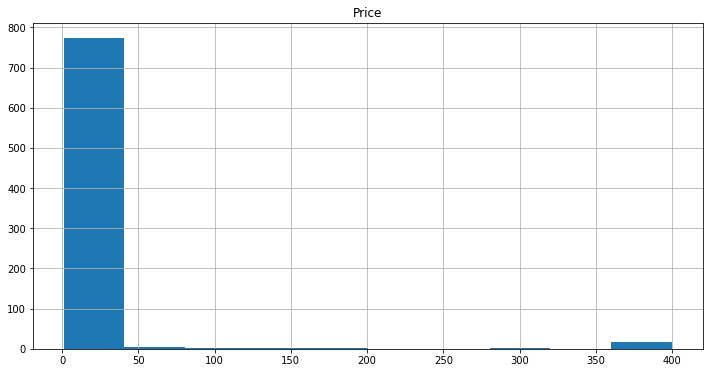

In [43]:
paid.hist('Price', grid=True, figsize=(12,6))


It seem that The distributions of prices is heavily skewed to the right and we have a few outliers.

In [44]:
paid.sort_values('Price',ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
213,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300,"10,000+",400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
200,most expensive app (H),FAMILY,4.3,6,1.500,100+,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
349,I am rich (Most expensive app),FINANCE,4.1,129,2.700,"1,000+",399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up
212,💎 I'm rich,LIFESTYLE,3.8,718,26.000,"10,000+",399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
354,I AM RICH PRO PLUS,FINANCE,4.0,36,41.000,"1,000+",399.99,Everyone,Finance,"June 25, 2018",1.0.2,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
168,B-52 Spirits of Glory Deluxe,GAME,4.3,12,29.000,100+,0.99,Everyone,Arcade,"September 2, 2017",1.5.9,2.3 and up
288,X Back - Icon Pack,PERSONALIZATION,4.5,56,26.000,"10,000+",0.99,Everyone,Personalization,"June 29, 2018",1.6.2,4.1 and up
563,CT and XR Dose Calculator,MEDICAL,NaN,3,0.097,50+,0.99,Everyone,Medical,"January 22, 2014",2014.01,1.6 and up
559,Emergency Brain CT,MEDICAL,NaN,2,19.000,10+,0.99,Everyone,Medical,"April 17, 2018",1.0.0,4.1 and up


It seems these apps are not only very niche, but they also would spoil our data, given how disparate the prices are from the others.

Looking back at the histogram, it's clear that the vast majority of apps have a price significantly below $50. Let's restrict our analysis to these rows:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96e51d6290>]],
      dtype=object)

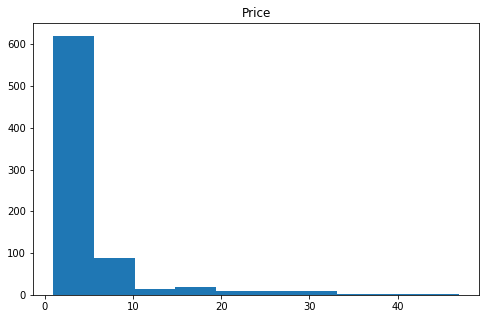

In [45]:

affordable_apps = paid[paid["Price"]<50].copy()
affordable_apps.hist(column="Price", grid=False, figsize=(8,5))


In [48]:
# Create a mask called cheap to identify the apps in affordable_apps that cost less than $5.
cheap = affordable_apps["Price"] < 5

# Create a mask called reasonable to identify the apps in affordable_apps that cost $5 or more.
reasonable = affordable_apps["Price"] >= 5


0       True
1       True
2       True
3       True
4       True
       ...  
793     True
794    False
795    False
796     True
797     True
Name: Price, Length: 774, dtype: bool

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96e56d1750>]],
      dtype=object)

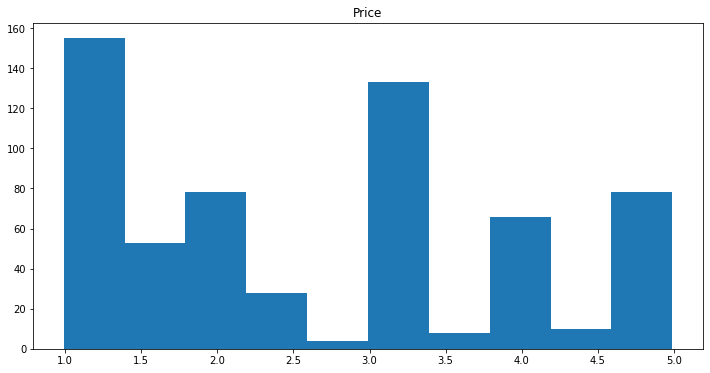

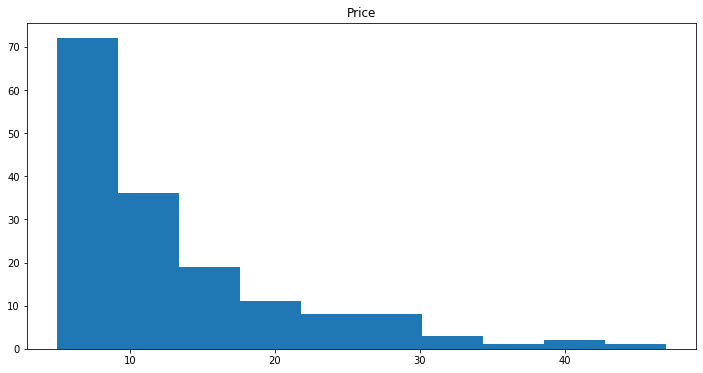

In [49]:

affordable_apps[cheap].hist("Price", grid=False, figsize=(12,6))
affordable_apps[reasonable].hist("Price", grid=False, figsize=(12,6))


In [50]:
affordable_apps['affordability'] = np.where(affordable_apps['Price']< 5, 'cheap', 'reasonable' )
affordable_apps['affordability'] 


0           cheap
1           cheap
2           cheap
3           cheap
4           cheap
          ...    
793         cheap
794    reasonable
795    reasonable
796         cheap
797         cheap
Name: affordability, Length: 774, dtype: object

In [55]:
# or
# affordable_apps["affordability"] = affordable_apps['Price'].apply(lambda price :"cheap" if price <5 else 'reasonable')
# affordable_apps["affordability"] 

In [56]:
# Explanation
df = pd.DataFrame([[4, 9]] * 3, columns=['A', 'B'])
s= df.apply(np.sum, axis=0)
s


A    12
B    27
dtype: int64

In [57]:
ss = df.apply(np.sum, axis=1)
ss

0    13
1    13
2    13
dtype: int64

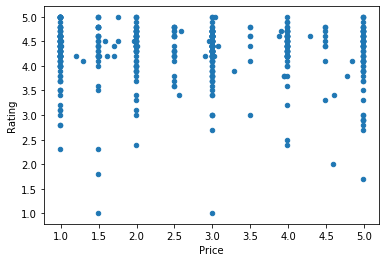

In [58]:
affordable_apps[cheap].plot(kind = 'scatter', x ="Price", y = "Rating")


# Measuring "how related" two numerical ['Rating','Price'] variables.

In [59]:
affordable_apps[cheap].corr().loc[['Rating','Price']]



,Rating,Reviews,Size,Price
Rating,1.000000,0.101934,0.098124,-0.048762
Price,-0.048762,0.004918,0.078832,1.000000


In the graph above, we see that there doesn't seem to be any clear relation between price and rating for the cheap apps. In fact, the Pearson coefficient in this instance is around −0.05:

This is good news for our price tweaking strategy, because it suggests that we can change prices without it being reflected in the apps' rating.

We can increase the price of those apps that cost less than, say, the mean cheap price, to the mean cheap price. We would then monitor the behavior of these apps — possibly by using statistical techniques like hypothesis testing, which you'll learn later — to confirm that there is an increase in profits.

In [60]:
# Find the mean price of the cheap apps and assign it to cheap_mean.
cheap_mean = affordable_apps.loc[cheap ,"Price"].mean()

In [61]:
cheap_mean 

2.5973246329526987

In [62]:
affordable_apps.loc[cheap, "price_criterion"] = affordable_apps["Price"].apply(
    lambda price: 1 if price < cheap_mean else 0
)


In [63]:
affordable_apps.loc[cheap, "price_criterion"]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
791    1.0
792    1.0
793    1.0
796    1.0
797    1.0
Name: price_criterion, Length: 613, dtype: float64

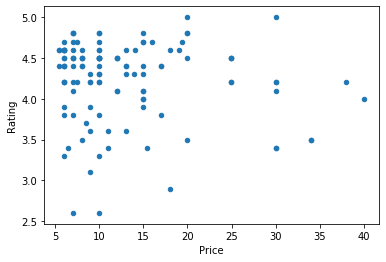

In [64]:

affordable_apps[reasonable].plot(kind='scatter', x='Price',y="Rating")

# Let's Conclude that for reasonable apps there also isn't any significant relationship between price and rating.

In [65]:
affordable_apps[reasonable].corr().loc['Rating','Price']

-0.11734743206298519

In the graph above, we see that there doesn't seem to be any clear relation between price and rating for the cheap apps. In fact, the Pearson coefficient in this instance is around −0.1:

In [66]:
# Find the mean price of the reasonable apps and assign it to cheap_mean.
reasonable_mean = affordable_apps.loc[reasonable,"Price"].mean()

In [67]:
# Find the mean price of the reasonable apps and assign it to cheap_mean.

affordable_apps.loc[reasonable,"price_criterion"] = affordable_apps["Price"].apply(
    lambda price: 1 if price < reasonable_mean else 0)

In [68]:
affordable_apps['Genres'].unique()

array(['Business', 'Communication', 'Dating', 'Education;Pretend Play',
       'Education;Education', 'Entertainment', 'Food & Drink',
       'Health & Fitness', 'Board', 'Puzzle', 'Strategy',
       'Simulation;Education', 'Simulation', 'Action', 'Role Playing',
       'Educational;Creativity', 'Educational;Pretend Play',
       'Education;Creativity', 'Casual;Pretend Play', 'Casual;Education',
       'Casual;Action & Adventure', 'Educational;Education',
       'Board;Brain Games', 'Board;Pretend Play',
       'Board;Action & Adventure', 'Education;Action & Adventure',
       'Arcade;Action & Adventure', 'Card;Action & Adventure', 'Medical',
       'Photography', 'Sports', 'Personalization', 'Productivity',
       'Weather', 'Tools', 'Arcade', 'Racing', 'Education',
       'Puzzle;Brain Games', 'Travel & Local', 'Lifestyle',
       'Auto & Vehicles', 'Adventure', 'Card', 'Casual',
       'News & Magazines', 'Shopping', 'Books & Reference', 'Social',
       'Art & Design', 'Video Playe

In [69]:
affordable_apps["genre_count"] = affordable_apps['Genres'].str.count(';')+1
affordable_apps["genre_count"]


0      1
1      1
2      1
3      1
4      1
      ..
793    1
794    1
795    1
796    1
797    1
Name: genre_count, Length: 774, dtype: int64

We counted the occurrences of ; in the Genres column above for each row, which give us the number of separators, and we added one to get the number of values.

In [70]:
# Let's now see how the mean price varies across the number of genres
genres_mean  = affordable_apps.groupby(["affordability","genre_count"]).mean().loc[:,["Price"]]
genres_mean 

Price
affordability genre_count           
cheap         1             2.519002
              2             3.185833
reasonable    1            13.071911
              2             6.865000

Apps that belong to two genres are more expensive among the cheap apps and cheaper among the reasonable apps.

For each segment, let's label the apps that cost less than their corresponding segments' mean with 1, and the others with 0:

In [71]:
def label_genres(row):
    """For each segment in `genres_mean`,
    labels the apps that cost less than its segment's mean with `1`
    and the others with `0`."""
  
    price = row['Price']
    if price > genres_mean.loc[row['affordability'],row['genre_count']][0]:
        return 1
    else:
        return 0

affordable_apps["genre_criterion"] = affordable_apps.apply(
    label_genres, axis="columns")


In [72]:
categories_mean = affordable_apps.groupby(["affordability",'Category']).mean()[['Price']]


In [73]:
def label_categories(row):
    """For each segment in `categories_mean`,
    labels the apps that cost less than its segment's mean with `1`
    and the others with `0`."""
    aff = row['affordability']
    cat = row["Category"]
    price = row['Price']
    if price > categories_mean.loc[(aff, cat)][0]:
        return 1
    else:
        0
        

affordable_apps["category_criterion"] = affordable_apps.apply(
    label_categories, axis="columns")

# Technique of majority voting.

In [74]:
criteria = ["price_criterion", "genre_criterion", "category_criterion"]
# to find mode per each column.
affordable_apps["Result"] = affordable_apps[criteria].mode(axis='columns').drop([1],axis=1)
affordable_apps["Result"].sample(5)

384    1.0
123    0.0
68     1.0
152    0.0
647    1.0
Name: Result, dtype: float64

In [75]:
nr_eleigible = affordable_apps["Result"].sum()
print(nr_eleigible , nr_eleigible/affordable_apps.shape[0], sep = "\n")

333.0
0.43023255813953487


We see that 333 apps — roughly 43% of the paid apps — are eligible for a price increase. This is a significant number, and we consider the possibility that increasing the price for these apps will have a significant impact.

In [76]:
def new_price(row):
    
    if row["affordability"] == "cheap":
        return round(max(row["Price"], cheap_mean), 2)
    else:
        return round(max(row["Price"], reasonable_mean), 2)
affordable_apps["New price"] = affordable_apps.apply(new_price,axis=1)
affordable_apps["New price"] 

0       4.99
1       4.99
2       4.99
3       4.99
4       3.99
       ...  
793     2.60
794    12.92
795    16.99
796     2.60
797     2.60
Name: New price, Length: 774, dtype: float64

In [77]:
affordable_apps['Installs']= affordable_apps['Installs'].str.replace("[+,]","").astype(int)
affordable_apps['Installs']

0      100000
1      100000
2      100000
3      100000
4      100000
        ...  
793       100
794      1000
795     10000
796     10000
797        50
Name: Installs, Length: 774, dtype: int64

In [78]:
affordable_apps["Impact"] = (affordable_apps["New price"]-affordable_apps["Price"])*affordable_apps["Installs"]
affordable_apps["Impact"] 

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
        ...   
793      161.0
794     4930.0
795        0.0
796    14000.0
797       78.0
Name: Impact, Length: 774, dtype: float64

In [79]:
total_impact = affordable_apps["Impact"].sum()
total_impact 

198582357.64999998